Team leader: Jiaqin Kang<br>
Student ID: 33656491<br>
Team member : Aromal Shiney<br>
student id: 33659221<br>

<h1>Hypotheses</h1>

The following hypotheses were made:<br>
That the outputs can be predicted from the inputs<br>
The available data is sufficiently informative to learn the relationship between inputs and outputs.<br>

<h1>Content</h1>
<li>X0:  Category of the building 
<li>X1: Relative Compactness
<li>X2: Surface Area
<li>X3: Wall Area
<li>X4: Roof Area
<li>X5: Overall Height
<li>X6: Orientation
<li>X7: Glazing Area
<li>X8: Glazing Area Distribution
<li>Y: Heating Load

In [142]:
# load the dataset
import pandas as pd
df = pd.read_csv('datcw_na.csv')
# check the df
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [143]:
# check the shape of the df
df.shape

(768, 10)

<h1>Data pre-processing and data cleaning</h1>

In [144]:
# check for NaN values
df.isnull().sum()

X0     0
X1     0
X2     0
X3    40
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_6572\665299678.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black', fmt='.2f')


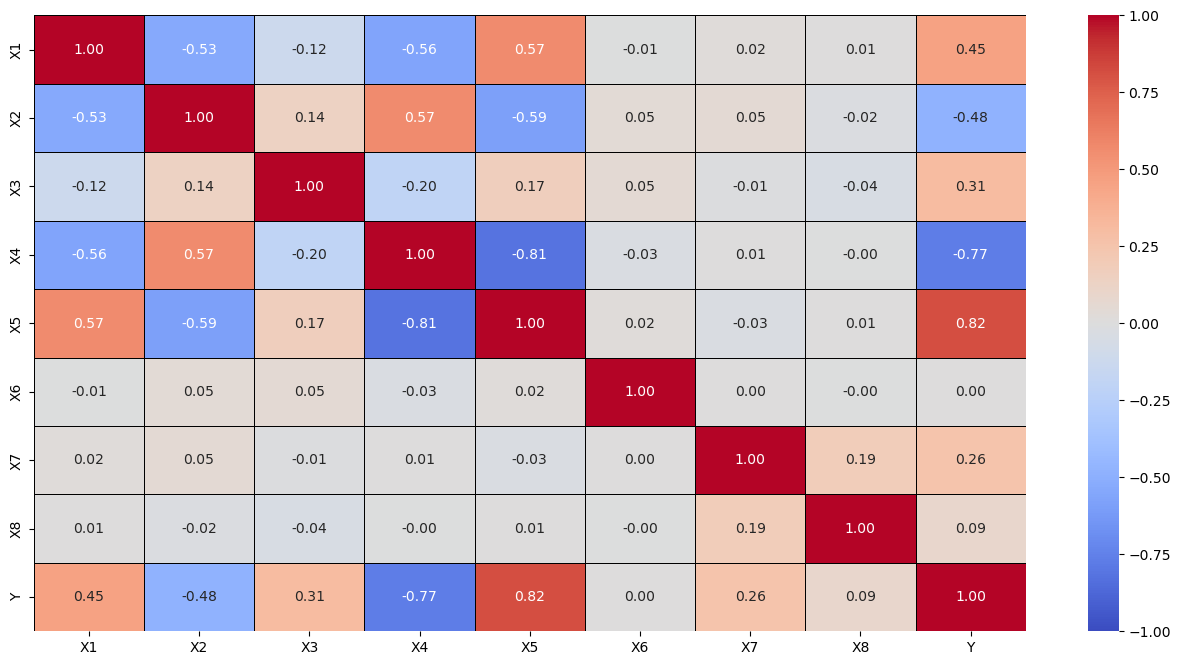

In [145]:
# check for data correlations using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black', fmt='.2f')
plt.show()

<AxesSubplot:>

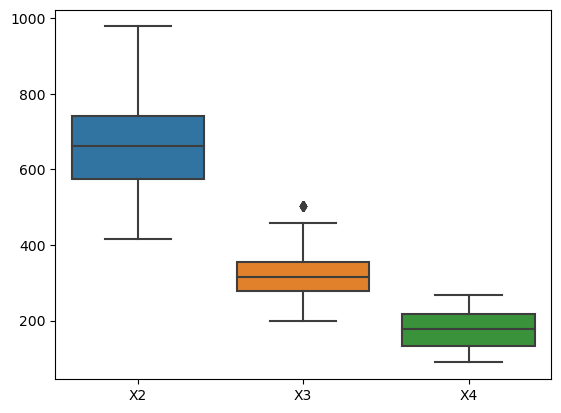

In [146]:
# box plot selected the features
areaFeatures = ['X2','X3','X4']
sns.boxplot(data = df[areaFeatures])


In [147]:
# calculate std, mean and others
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


The above isnull function is used to check if there are any null values in the dataset. This is done to ensure that the dataset is clean as if there are null values, it will affect the model performance. "garbage in bargabe out".
The result shows that only on the column "X3"/"Wall Area" contains null values. There are serval ways to deal with null values like dropping the rows with null values, replacing the null values with mean or median values of the column. In this case, consider the ratio of missing counts "40" to the total number of rows "768" and the importance correlation between other columns. The best solution is to replace the null values with the mean value of this column "X3"/"Wall Area".

In [148]:
# calculate the mean of X3
X3_mean = df['X3'].mean()
# replace NaN values in "X3" with the X3_mean
df['X3'].fillna(X3_mean, inplace=True)

In [149]:
# check for NaN values again to verify the changes
df.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y     0
dtype: int64

In [150]:
# check X0 column group values count
df['X0'].value_counts()

C2    265
C3    260
C1    243
Name: X0, dtype: int64

<h3> Label Encoding </h3>

In [151]:
from sklearn import preprocessing as prep
labelEncoder = prep.LabelEncoder()
df['X0'] = labelEncoder.fit_transform(df['X0'])
df.head()


,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,2,1.19,622.55,321.102527,89.31,7.00,1.98,0.0,0.0,15.55
1,0,1.19,622.55,323.400000,109.15,7.70,3.00,0.0,0.0,15.55
2,0,0.88,463.05,291.060000,99.23,5.67,4.40,0.0,0.0,15.55
3,1,0.79,509.36,291.060000,121.28,6.30,4.05,0.0,0.0,15.55
4,0,0.89,507.15,385.390000,121.28,7.70,2.00,0.0,0.0,20.84


In [152]:
# split to x and y
x = df.drop('Y', axis=1)
y = df['Y']
print(x.shape)
print(y.shape)

(768, 9)
(768,)


In [153]:
# reshape y to 2 dimensions
y = y.values.reshape(-1,1)

In [154]:
# scale the data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

<h1>Spliting data</h1>
<li>Training data: 70%
<li>Test data: 205

In [155]:
# split data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print( x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 9)
(231, 9)
(537, 1)
(231, 1)


Baseline model

In [156]:
# import the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [157]:
def build_model(): #build the model
    # create a linear regression model
    model = models.Sequential() # create a sequential model
    model.add(layers.Dense(64, activation = 'relu',input_shape=(x_train.shape[1],))) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1))
    
    model.compile( #compile the model
        optimizer = 'rmsprop', # use rmsprop optimizer
        loss='mse', #loss function
        metrics=['mae'], #metrics
    )
    return model

In [158]:
model_1 = build_model()
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                640       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [159]:
# train the model
model_1_history = model_1.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=0,batch_size=512)

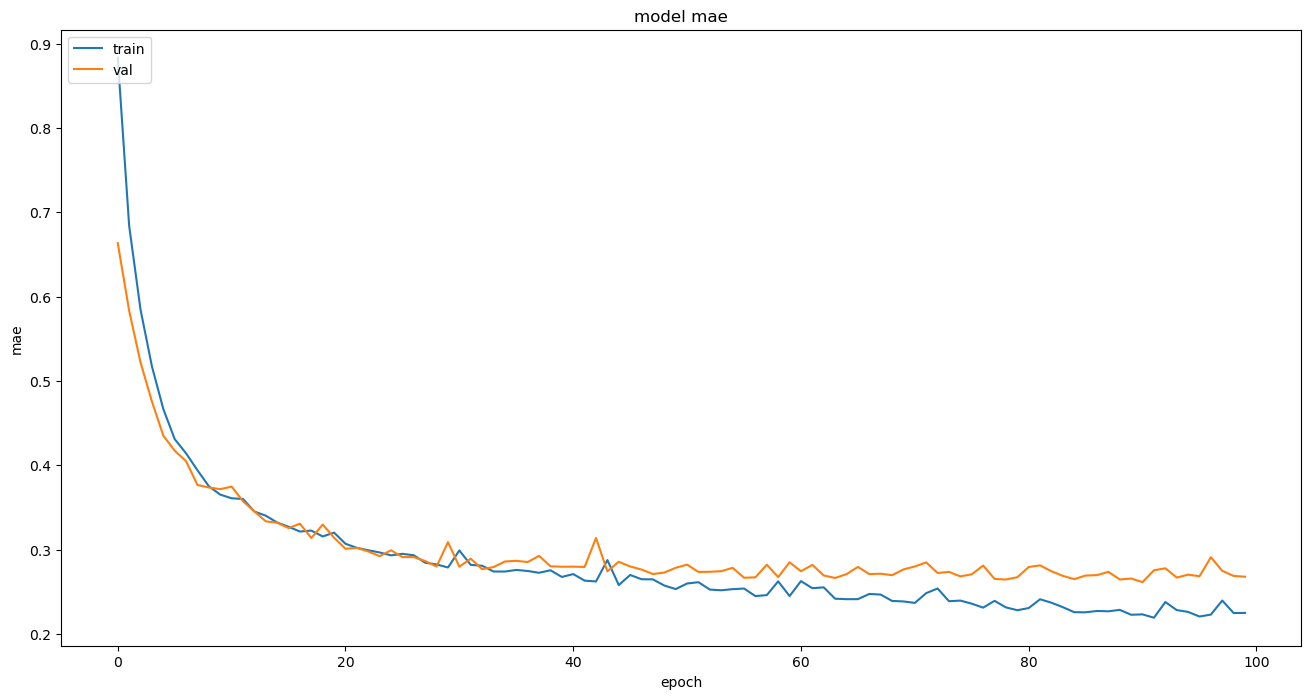

In [160]:
# plot the mae
plt.figure(figsize=(16,8))
plt.plot(model_1_history.history['mae'])
plt.plot(model_1_history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

//////////////////////////////////////////////////////////////////////////////////////////////////////////<br>

In [161]:
# early stopping epochs around 35

In [162]:
# create a new model with same parameters
model_2 = build_model()
# train the model
model_2_history = model_2.fit(x_train, y_train, epochs=35, validation_data=(x_val, y_val), verbose=0,batch_size=512)

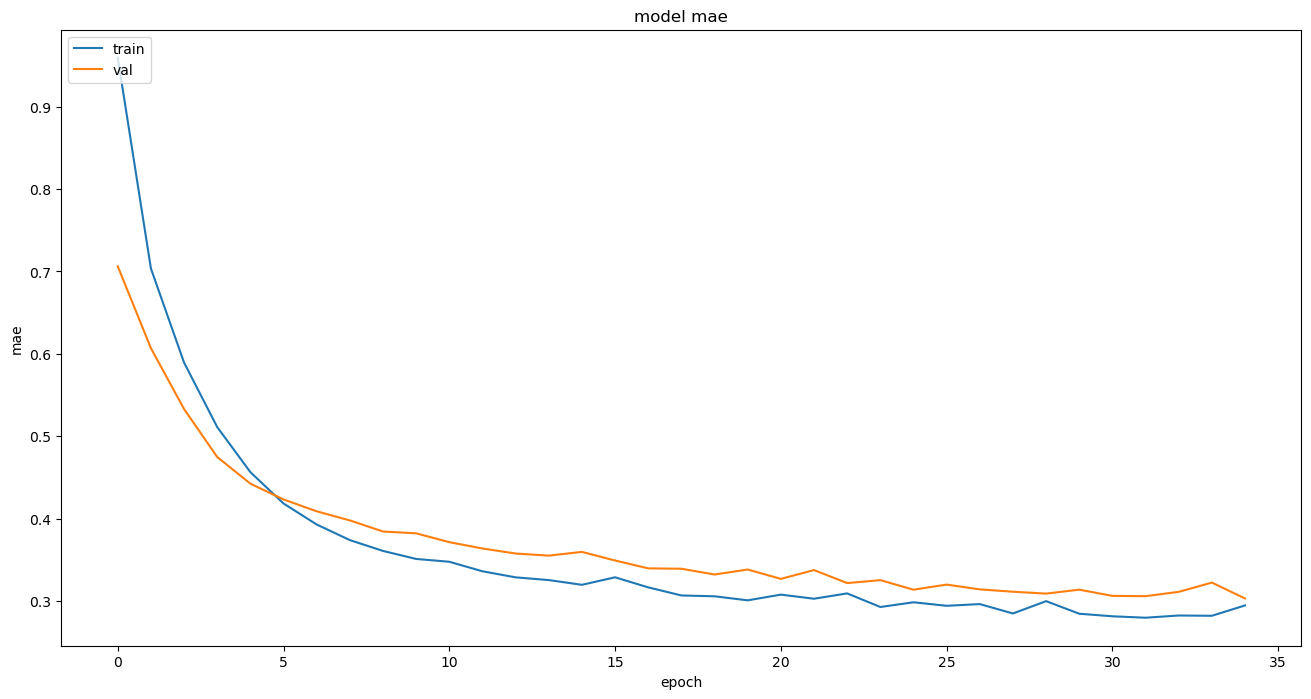

In [163]:
# plot the mae
plt.figure(figsize=(16,8))
plt.plot(model_2_history.history['mae'])
plt.plot(model_2_history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

summary, coing to test on the test data and see the performance of the model

In [164]:
y_pred = model_2.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [165]:
print(y_pred.shape)

(231, 1)


In [166]:
# import numpy     
import numpy as np
# function to calculate the mae
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

# calculate the mae
baselineModel = mae(y_test, y_pred)
print(baselineModel)

0.35051929317912417


//comment on the table based on the fine tuned model

<h1>LinearRegression Model</h1>

In [167]:
# import libary for linear regression
from sklearn.linear_model import LinearRegression

In [168]:
LinearRegressor = LinearRegression()

In [171]:
LinearRegressor.fit(x_train, y_train)

LinearRegression()

In [172]:
LinearRegressor.score(x_test, y_test)

0.7628517921653891